
---


Hugi Reyhandani Munggaran

## Part 1 Segmentation
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


foodtrucks = pd.read_csv('food_trucks.csv')
foodtrucks

,vendorID,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,1,12.40,3.0,163,6.83,2,0.12,30.0
1,2,12.10,1.8,140,3.62,5,269.24,40.5
2,3,13.52,6.0,139,3.86,5,8.17,35.7
3,4,15.56,4.0,124,4.05,3,99.09,32.8
4,5,15.08,8.5,186,6.51,5,33.42,35.6
...,...,...,...,...,...,...,...,...
243,244,14.70,2.5,153,10.13,3,127.16,40.2
244,245,14.75,1.1,170,7.88,4,36.29,41.6
245,246,15.89,0.7,162,3.22,4,44.35,37.8
246,247,16.17,1.2,153,4.62,4,91.98,41.1


A. (a). Including "vendorID" in a clustering model would not help the model differentiate between the food trucks based on their characteristics. Instead, it would just confuse the model and potentially lead to an incorrect clustering results. This is because the Euclidean distance, which is commonly used in clustering, is a measure of the distance between two points in space. Lets take a look below euclidian formula:

euclidian = sqrt((x1 - x2)^2 + (y1 - y2)^2 + (z1 - z2)^2)

Let say we have three variables "vendorID" ,"avg_transaction_cost" and "mnths_operational" and applied euclidian formula as x,y,z respectively. In this case, it will ruined the euclidian distance because vendor ID contained number about indexing and there is nothing to do with the essential of data. Therefore, including "vendorID" in the analysis would not be useful and could potentially lead to less accurate clustering results.



In [ ]:
foodtrucks = foodtrucks.drop('vendorID', axis=1)


In [ ]:
foodtrucks

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,12.40,3.0,163,6.83,2,0.12,30.0
1,12.10,1.8,140,3.62,5,269.24,40.5
2,13.52,6.0,139,3.86,5,8.17,35.7
3,15.56,4.0,124,4.05,3,99.09,32.8
4,15.08,8.5,186,6.51,5,33.42,35.6
...,...,...,...,...,...,...,...
243,14.70,2.5,153,10.13,3,127.16,40.2
244,14.75,1.1,170,7.88,4,36.29,41.6
245,15.89,0.7,162,3.22,4,44.35,37.8
246,16.17,1.2,153,4.62,4,91.98,41.1


B.(a) The describe() function is a very useful tool to gain a quick overview of the numerical columns in a dataset. When it called, it will return a statistic summary for each column such as count, mean, standard deviation, minimum, maximum, and the quartile values. For me as an analyst, this information can be used to identify any potential issues with the data, such as missing values, outliers, or strange distributions. For example, if the minimum or maximum values of a column are very different from the other values, it could indicate a problem with the data that needs to be addressed before building a model. Overall, the describe() function is a valuable tool for exploring and understanding the characteristics of a dataset before building a model.

In [ ]:
foodtrucks.describe()

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,14.334274,3.622581,148.822581,5.008468,3.044355,52.435484,40.824194
std,1.412888,3.779335,18.942080,1.683380,1.719750,52.002194,5.775277
min,8.810000,0.000000,88.000000,-0.270000,0.000000,0.120000,25.400000
25%,13.360000,1.175000,136.750000,3.780000,2.000000,16.305000,37.200000
50%,14.395000,2.600000,149.000000,5.090000,3.000000,38.315000,40.700000
75%,15.242500,4.500000,162.000000,6.105000,4.000000,68.637500,44.200000
max,18.320000,27.300000,202.000000,10.130000,9.000000,271.730000,58.600000


C.(a).Based on the result below, it appears that there are no missing values present in the dataset.

In [ ]:
print(foodtrucks.isnull().sum())

avg_transaction_cost    0
mnths_operational       0
days_yr                 0
avg_cost_item           0
number_trucks           0
dist_lobland            0
bev_percent             0
dtype: int64


The result of the "describe" function applied to the dataset in question B shows that the minimum value of "avg_cost_item" is negative (-0.27), which is not possible as it represents the average cost of an item. This negative value could be a result of an error during data entry. In addition it was found that the minimum value of the "number_trucks" variable is 0, which indicates that the vendor didn't have any trucks. However, this seems unlikely because other variables in the dataset suggest that the vendor had some sort of operation. Therefore, it is recommended to remove the row with 0 as the value for "number_trucks" To ensure the accuracy of the data, it is recommended to remove this value from the dataset. 

In [ ]:
# Remove Impossible value in average cost item row
foodtrucks = foodtrucks[foodtrucks['avg_cost_item'] >= 0]
foodtrucks = foodtrucks[foodtrucks['number_trucks'] > 0]
foodtrucks

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,12.40,3.0,163,6.83,2,0.12,30.0
1,12.10,1.8,140,3.62,5,269.24,40.5
2,13.52,6.0,139,3.86,5,8.17,35.7
3,15.56,4.0,124,4.05,3,99.09,32.8
4,15.08,8.5,186,6.51,5,33.42,35.6
...,...,...,...,...,...,...,...
243,14.70,2.5,153,10.13,3,127.16,40.2
244,14.75,1.1,170,7.88,4,36.29,41.6
245,15.89,0.7,162,3.22,4,44.35,37.8
246,16.17,1.2,153,4.62,4,91.98,41.1


D.(a). Standardization is recommended when performing k-means clustering because k-means is a distance-based algorithm, and the scale of the variables can really impacted the clustering results. In this case, the variables in the dataset have different scales, ranging from a minimum of 0 to a maximum of 271.73, which could lead to inaccurate clustering results. Therefore, standardization is recommended before performing k-means clustering on this dataset.

(b). converting values into z-score using the StandardScaler from scikit-learn and stored it to new dataframe name foodtrucks.z

In [ ]:
from sklearn.preprocessing import StandardScaler
# initialize the StandardScaler object
scaler = StandardScaler()
# scale the data and store it in a new dataframe
foodtrucks.z = pd.DataFrame(scaler.fit_transform(foodtrucks), columns=foodtrucks.columns)
foodtrucks.z

<ipython-input-7-c1ab93391a9b>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  foodtrucks.z = pd.DataFrame(scaler.fit_transform(foodtrucks), columns=foodtrucks.columns)


,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
0,-1.373570,-0.153446,0.770541,1.087281,-0.759417,-1.011977,-1.878933
1,-1.585791,-0.469802,-0.448105,-0.838445,1.111147,4.206921,-0.019375
2,-0.581279,0.637444,-0.501089,-0.694465,1.111147,-0.855868,-0.869459
3,0.861822,0.110184,-1.295859,-0.580481,-0.135896,0.907294,-1.383051
4,0.522269,1.296520,1.989187,0.895308,1.111147,-0.366208,-0.887169
...,...,...,...,...,...,...,...
229,0.253456,-0.285261,0.240695,3.066999,-0.135896,1.451641,-0.072505
230,0.288826,-0.654344,1.141433,1.717191,0.487626,-0.310552,0.175436
231,1.095265,-0.759796,0.717557,-1.078411,0.487626,-0.154249,-0.497547
232,1.293337,-0.627981,0.240695,-0.238530,0.487626,0.769414,0.086885


E.(a). Elbow chart is generated by using kmeans algorithm from scikit learn and iterate over different values of k.

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

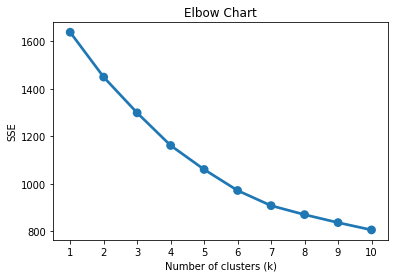

In [ ]:
from sklearn.cluster import KMeans
SSE = {}
# Iterate over values of k from 1 to 10
for k in range(1, 11):
# Create a KMeans object with k clusters
  kmeans = KMeans(n_clusters=k, random_state=654)
# Fit the KMeans object to the foodtrucks.z
  kmeans.fit(foodtrucks.z)
# Add the inertia to the list
  SSE[k]=kmeans.inertia_
# Plot the elbow chart
sns.pointplot(x=list(SSE.keys()),y=list(SSE.values()))
plt.title('Elbow Chart')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()

F. According to the elbow plot, it seems that choosing 5 clusters for the k-means model might be appropriate because the point of inflection occurs at this point. This suggests that going beyond 5 clusters may not result in a significant decrease in the cluster sum of squares.

G. After determining that 5 clusters might be a good choice based on the elbow plot, I ran a k-means model with the chosen number of clusters.

In [ ]:
k = 5  # Chosen cluster numbers
kmeans = KMeans(n_clusters=k, random_state=654)
kmeans.fit(foodtrucks.z)


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=654)

In [ ]:
# Predict the cluster labels for each sample
labels = kmeans.predict(foodtrucks.z)
# Add the labels as a new column to the dataframe
foodtrucks.z['cluster'] = labels

In [ ]:
foodtrucks.z

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent,cluster
0,-1.373570,-0.153446,0.770541,1.087281,-0.759417,-1.011977,-1.878933,0
1,-1.585791,-0.469802,-0.448105,-0.838445,1.111147,4.206921,-0.019375,1
2,-0.581279,0.637444,-0.501089,-0.694465,1.111147,-0.855868,-0.869459,3
3,0.861822,0.110184,-1.295859,-0.580481,-0.135896,0.907294,-1.383051,2
4,0.522269,1.296520,1.989187,0.895308,1.111147,-0.366208,-0.887169,4
...,...,...,...,...,...,...,...,...
229,0.253456,-0.285261,0.240695,3.066999,-0.135896,1.451641,-0.072505,0
230,0.288826,-0.654344,1.141433,1.717191,0.487626,-0.310552,0.175436,0
231,1.095265,-0.759796,0.717557,-1.078411,0.487626,-0.154249,-0.497547,2
232,1.293337,-0.627981,0.240695,-0.238530,0.487626,0.769414,0.086885,2


H.

In [ ]:
summary_stats= foodtrucks.z.groupby(['cluster']).agg({
'avg_transaction_cost': 'mean',
'mnths_operational': 'mean',
'days_yr': 'mean',
'avg_cost_item': 'mean',
'number_trucks': 'mean',
'dist_lobland': 'mean',
'bev_percent': 'mean',
}).round(2)

summary_stats

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent
cluster,,,,,,,
0,-0.61,-0.32,-0.14,0.92,-0.09,-0.25,0.32
1,-0.41,-0.29,-0.21,0.02,-0.06,2.91,0.05
2,0.42,-0.22,0.16,-0.48,-0.63,-0.13,-0.01
3,0.23,-0.23,-0.48,-0.50,1.34,-0.27,-0.31
4,0.07,2.34,0.86,0.01,0.14,-0.32,-0.38


I. 

In [ ]:
# Add the labels to initial dataset
foodtrucks['cluster'] = labels

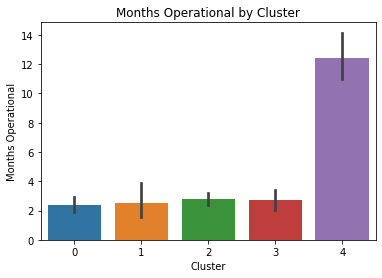

In [ ]:
# Vertical barplot
sns.barplot(data=foodtrucks, x='cluster', y='mnths_operational')
plt.title('Months Operational by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Months Operational')
plt.show()

###Vertical Barplot Months Operational 
Looking at the plot, we can see that clusters 4 have the highest average number of months operational. While the rest of the clusters have the lowest average number of months operational. This information can be useful for Lobster Land in deciding which food trucks to allow into the park. They may want to prioritize the more established food trucks (in clusters 4) or consider giving newer trucks (in clusters 0,1,2 and 3) a chance to gain exposure in the park.

<AxesSubplot:title={'center':'Mean numbers of average cost item per cluster'}, xlabel='avg_cost_item', ylabel='cluster'>

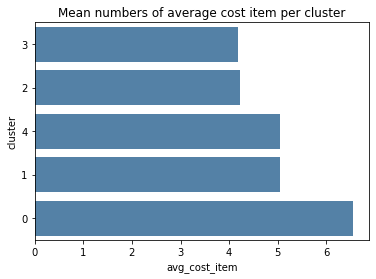

In [ ]:
# Horizontal Barplot
order= foodtrucks.groupby(['cluster'])['avg_cost_item'].mean().sort_values().index
plt.title("Mean numbers of average cost item per cluster")
sns.barplot(y=foodtrucks['cluster'], x=foodtrucks['avg_cost_item'],ci=None, order=order, color='steelblue', orient='h')

###Horizontal Barplot Avg Cost Item
Based on the bar plot of average cost per item by cluster, we can observe that Cluster 0 has the highest average cost per item, with an average of around 6.5 dollar. Clusters 1 and 4 have a similar average cost per item, with an average of around 5 dollar. Cluster 2 and Cluster 3 have the lowest average cost per item, with an average of around 4 dollar. This information can be useful for Lobster Land in deciding which food trucks to grant access to the park, depending on their target market and pricing strategy. For example, if Lobster Land is targeting a higher-end market, they may want to prioritize food trucks in cluster 0, while if they are targeting a more budget-conscious market, they may want to focus on food trucks in cluster 3.

In [ ]:
discretionary= foodtrucks.groupby('cluster')[['avg_transaction_cost','avg_cost_item']].mean()
discretionary

,avg_transaction_cost,avg_cost_item
cluster,,
0,13.482388,6.554328
1,13.767500,5.048125
2,14.937294,4.219059
3,14.663023,4.177209
4,14.442609,5.042174


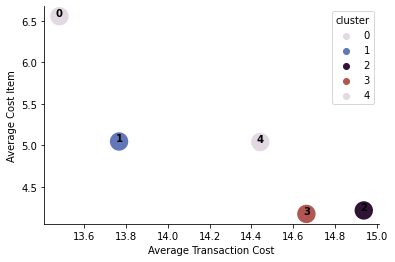

In [ ]:

plt.xlabel("Average Transaction Cost")
plt.ylabel('Average Cost Item')
sns.despine()
p1=sns.scatterplot(data=discretionary, x='avg_transaction_cost', y='avg_cost_item', s=400,hue='cluster', palette='twilight')
for line in range(0,discretionary.shape[0]):
  p1.text(discretionary.avg_transaction_cost[line], discretionary.avg_cost_item[line],
          discretionary.index[line], horizontalalignment='center',
          size='medium',color='black',weight='semibold')

###Scatter Plot Avg Transaction Cost vs Avg Cost per Item
Based on the scatter plot and the cluster analysis, we can see that the clusters have different characteristics. Cluster 0 has the lowest average transaction cost and average cost per item, while Cluster 2 has the highest. Cluster 4 has a relatively high average transaction cost, but a lower average cost per item. Lobster Land can use this information to decide which vendors to invite based on their goals and priorities. For example, if they want to prioritize vendors with high transaction volume and are willing to pay a premium price for their spot, they can focus on vendors in Cluster 2. On the other hand, if they want to prioritize vendors with lower prices, they can focus on vendors in Cluster 0 and Cluster 4.

<AxesSubplot:ylabel='cluster'>

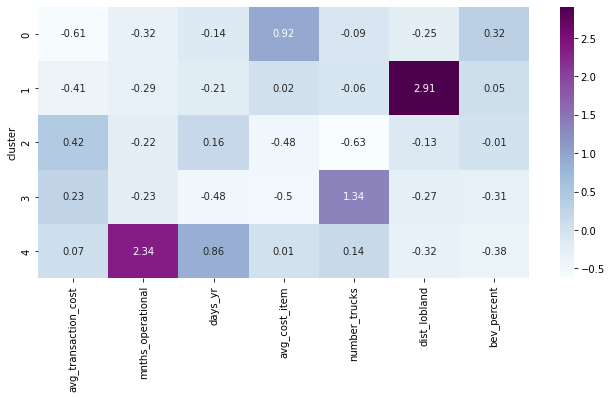

In [ ]:
plt.figure(figsize=(11,5))
sns.heatmap(summary_stats,annot=True,cmap='BuPu', fmt='g')

###Heatmap Features vs Clusters
In the heatmap plot above, we can see the standardized values for each feature across the five clusters. The values range from negative to positive, with the darker colors indicating more extreme values. We can see that Cluster 0 has relatively low values for all the features, except for the average cost per item which is relatively high. In contrast, Cluster 4 has high values for the number of months operational and days per year, but relatively low values for the distance to Lobster Land and the percentage of beverage sales. These insights can help Lobster Land to make informed decisions about which vendors to invite based on their priorities and goals.

J. According to the summary statistic in Question H, hereby the interpretation and name in each clusters. 

Cluster 0: This cluster has below-average values for average transaction cost, months operational, and days per year operational. However, it has an above-average average cost per item and beverage percentage, suggesting that vendors in this cluster may be focused on providing higher-priced or specialty beverages. We can name this cluster as "Premium Beverage Vendors"

Cluster 1: This cluster has below-average values for average transaction cost, months operational, days per year operational, and average cost per item. However, it has an above-average number of trucks delivering to the park, suggesting that vendors in this cluster may have larger-scale operations.
"We can name this cluster as "Distance Vendors"

Cluster 2: This cluster has an above-average value for average transaction cost and days per year operational, but below-average values for number of trucks and distance from Lobster Land. Vendors in this cluster may be focused on providing higher-end or specialty items to visitors, potentially with a focus on local or artisanal products. We can name this cluster as "Specialty Item Vendors"

Cluster 3: This cluster has above-average values for number of trucks and average cost per item, but below-average values for average transaction cost and distance from Lobster Land. Vendors in this cluster may be focused on providing higher-priced, potentially gourmet or specialty items that require more frequent deliveries. We can name this cluster as "Fancy Item Vendors"

Cluster 4: This cluster has above-average values for months operational and distance from Lobster Land, suggesting that vendors in this cluster may be focused on providing seasonal items to visitors who are willing to travel further to experience them, such as lobster or seafood shacks. We can name this cluster as "Seasonal Vendors"


In [ ]:
cluster_names = {
    0: "Premium Beverage Vendors",
    1: "Distance Vendors",
    2: "Specialty Item Vendors",
    3: "Fancy Item Vendors",
    4: "Seasonal Vendors"
}

# Rename the clusters in the original dataframe
foodtrucks.z['cluster'] = foodtrucks.z['cluster'].apply(lambda x: cluster_names[x])

# Check the new cluster names
print(foodtrucks.z['cluster'].unique())

['Premium Beverage Vendors' 'Distance Vendors' 'Fancy Item Vendors'
 'Specialty Item Vendors' 'Seasonal Vendors']


In [ ]:
foodtrucks.z

,avg_transaction_cost,mnths_operational,days_yr,avg_cost_item,number_trucks,dist_lobland,bev_percent,cluster
0,-1.373570,-0.153446,0.770541,1.087281,-0.759417,-1.011977,-1.878933,Premium Beverage Vendors
1,-1.585791,-0.469802,-0.448105,-0.838445,1.111147,4.206921,-0.019375,Distance Vendors
2,-0.581279,0.637444,-0.501089,-0.694465,1.111147,-0.855868,-0.869459,Fancy Item Vendors
3,0.861822,0.110184,-1.295859,-0.580481,-0.135896,0.907294,-1.383051,Specialty Item Vendors
4,0.522269,1.296520,1.989187,0.895308,1.111147,-0.366208,-0.887169,Seasonal Vendors
...,...,...,...,...,...,...,...,...
229,0.253456,-0.285261,0.240695,3.066999,-0.135896,1.451641,-0.072505,Premium Beverage Vendors
230,0.288826,-0.654344,1.141433,1.717191,0.487626,-0.310552,0.175436,Premium Beverage Vendors
231,1.095265,-0.759796,0.717557,-1.078411,0.487626,-0.154249,-0.497547,Specialty Item Vendors
232,1.293337,-0.627981,0.240695,-0.238530,0.487626,0.769414,0.086885,Specialty Item Vendors


The cluster model developed for Lobster Land can be a valuable tool for the Lobster Land management to make informed decisions about their vendors. By understanding the different clusters and their characteristics, the park can select vendors that align with their business goals and target market. For example, if Lobster Land wants to appeal to visitors looking for high-end or specialty items, they can focus on vendors from Cluster 2. On the other hand, if the park wants to offer a larger selection of beverages, they can seek out vendors from Cluster 0. With this information, Lobster Land can work with vendors to optimize costs and improve profitability for both parties. 

According to the kmeans model, cluster 0, the "Specialty Beverage Providers," could be a good fit for Lobster Land. Lobster Land is a seaside amusement park, and visitors are likely to be looking for refreshing beverages to cool off with on a hot summer day.

Cluster 0 vendors are focused on providing specialty beverages, which suggests that they may have a wide variety of unique and interesting drink options for visitors to choose from.

The focus on specialty beverages could help to create a distinctive brand identity for Lobster Land, potentially driving repeat visits from visitors who are looking to experience something unique and memorable.

The fact that Cluster 0 vendors have above-average average cost per item suggests that they may be able to charge a premium for their beverages, potentially leading to higher profits for both the park and the vendors themselves.

## Part 2 Conjoint Analysis
---

A. Import dataset

In [ ]:
woodie = pd.read_csv('woodie.csv')
woodie

,bundleID,start_high,maxspeed,steepest_angle,seats_car,drop,track_color,avg_rating
0,1,Yes,40,50,2,100,red,7.613468
1,2,Yes,40,50,2,100,blue,5.266737
2,3,Yes,40,50,2,100,green,4.871951
3,4,Yes,40,50,2,100,white,4.453202
4,5,Yes,40,50,2,200,red,5.476815
...,...,...,...,...,...,...,...,...
283,284,No,80,75,4,200,white,7.945668
284,285,No,80,75,4,300,red,6.428464
285,286,No,80,75,4,300,blue,5.458812
286,287,No,80,75,4,300,green,5.775802


B. Based on the descriptions provided, the "avg_rating" variable is numeric, while the "start_high", "maxspeed", "steepest_angle", "seats_car", "drop", and "track_color" variables are categorical.

C. 

In [ ]:
# Drop Bundle ID
woodie = woodie.drop("bundleID", axis=1)

In [ ]:
woodie

,start_high,maxspeed,steepest_angle,seats_car,drop,track_color,avg_rating
0,Yes,40,50,2,100,red,7.613468
1,Yes,40,50,2,100,blue,5.266737
2,Yes,40,50,2,100,green,4.871951
3,Yes,40,50,2,100,white,4.453202
4,Yes,40,50,2,200,red,5.476815
...,...,...,...,...,...,...,...
283,No,80,75,4,200,white,7.945668
284,No,80,75,4,300,red,6.428464
285,No,80,75,4,300,blue,5.458812
286,No,80,75,4,300,green,5.775802


In [ ]:
# Dummify remaining variables
woodie.Dum = pd.get_dummies(woodie, columns=['start_high','maxspeed','steepest_angle','seats_car','drop','track_color'],drop_first=True)


In [ ]:
woodie.Dum

,avg_rating,start_high_Yes,maxspeed_60,maxspeed_80,steepest_angle_75,seats_car_4,drop_200,drop_300,track_color_green,track_color_red,track_color_white
0,7.613468,1,0,0,0,0,0,0,0,1,0
1,5.266737,1,0,0,0,0,0,0,0,0,0
2,4.871951,1,0,0,0,0,0,0,1,0,0
3,4.453202,1,0,0,0,0,0,0,0,0,1
4,5.476815,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
283,7.945668,0,0,1,1,1,1,0,0,0,1
284,6.428464,0,0,1,1,1,0,1,0,1,0
285,5.458812,0,0,1,1,1,0,1,0,0,0
286,5.775802,0,0,1,1,1,0,1,1,0,0


(a.) The numeric input variables based on survey data should be dummified because they represent discrete options presented to the respondents, rather than continuous values. Dummifying these variables would helps us to represent each option as a separate binary variable (1 or 0), which would be more appropriate for modeling discrete choices. Additionally, dummifying the inputs would help us identify non-linearities in the data that may be missed if the numeric values were treated as a continuous range. This is important because the goal of conjoint analysis is to identify which product features consumers prefer, and dummifying the input variables can provide a more accurate representation of consumer preferences. Dummifying the inputs can also help mitigate the issue of multicollinearity, which can arise when modeling linear relationships between highly correlated variables.

D. 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Create a list of input variables
input_cols = list(woodie.Dum.columns)
input_cols.remove('avg_rating')

# Fit the linear regression model
X = woodie.Dum[input_cols]
y = woodie.Dum['avg_rating']
model = LinearRegression().fit(X, y)

E. 

In [ ]:
coefficients = pd.DataFrame(model.coef_,X.columns, columns=['Coefficient'])
coefficients

,Coefficient
start_high_Yes,1.056680
maxspeed_60,1.735847
maxspeed_80,1.494231
steepest_angle_75,-0.518575
seats_car_4,-0.442144
drop_200,1.041632
drop_300,1.199319
track_color_green,-0.065562
track_color_red,1.791008
track_color_white,-0.235712


F. After analyzing the data, there are certain features that are more popular among respondents than others. The most popular feature is the "maxspeed" option, with both the 60mph and 80mph options having positive coefficients. This is tells us that faster roller coasters are more appealing to customers. The next most popular feature is the "track_color" option, with the red color having the highest positive coefficient. This suggests that customers prefer more striking and eye-catching roller coaster designs.

Another popular feature is the "start_high" option, with the "Yes" option having a positive coefficient. This suggests that customers prefer roller coasters that start at a high altitude, which is in line with the trend of more intense and thrilling rides. The "drop" option is also popular, with the 200 feet and 300 feet options having positive coefficients. This indicates that customers prefer roller coasters with larger drops, which also similar to the trend of more intense and thrilling rides. 

On the other hand, the "seats_car" option with four seats per car has a negative coefficient, suggesting that customers prefer roller coasters with smaller cars. The "steepest_angle" option with a 75-degree drop has a negative coefficient, indicating that customers prefer less steep drops.

At last, before implementing the most popular options, there are several factors that Lobster Land should consider. First, they should consider the cost of implementing each of these features. For example, a roller coaster with a high maximum speed may require more powerful engines and more advance safety features, which could increase the cost of construction and maintenance. Second,
they should consider the market they are targeting. While a roller coaster with a high maximum speed and steep drops may be popular among individuals seeking extreme sensations, it may not appeal to families with young children.


## Part 3 Wildcard:  Marketing & Segments
---




I am highly interested in Celtics basketball games and I enjoy following NBA players on Instagram, as well as watching NBA highlights. Recently, I have noticed Wynnbet ads appearing in the middle of my Instagram stories, promoting their betting platform. It seems that these ads are aimed at sports fans who are particularly interested in basketball and the NBA, and who are seeking new and exciting ways to engage with these sports. Since I use Instagram mostly to follow NBA players and accounts that show game highlights, I fall into this consumer segment. In my opinion, the Wynnbet ads likely effective in targeting this segment of consumers. They are tailored to the interests and passions of sports fans, and highlight the excitement and potential rewards of sports betting. However, I do not personally find any satisfaction or enjoyment in taking part in betting activities.

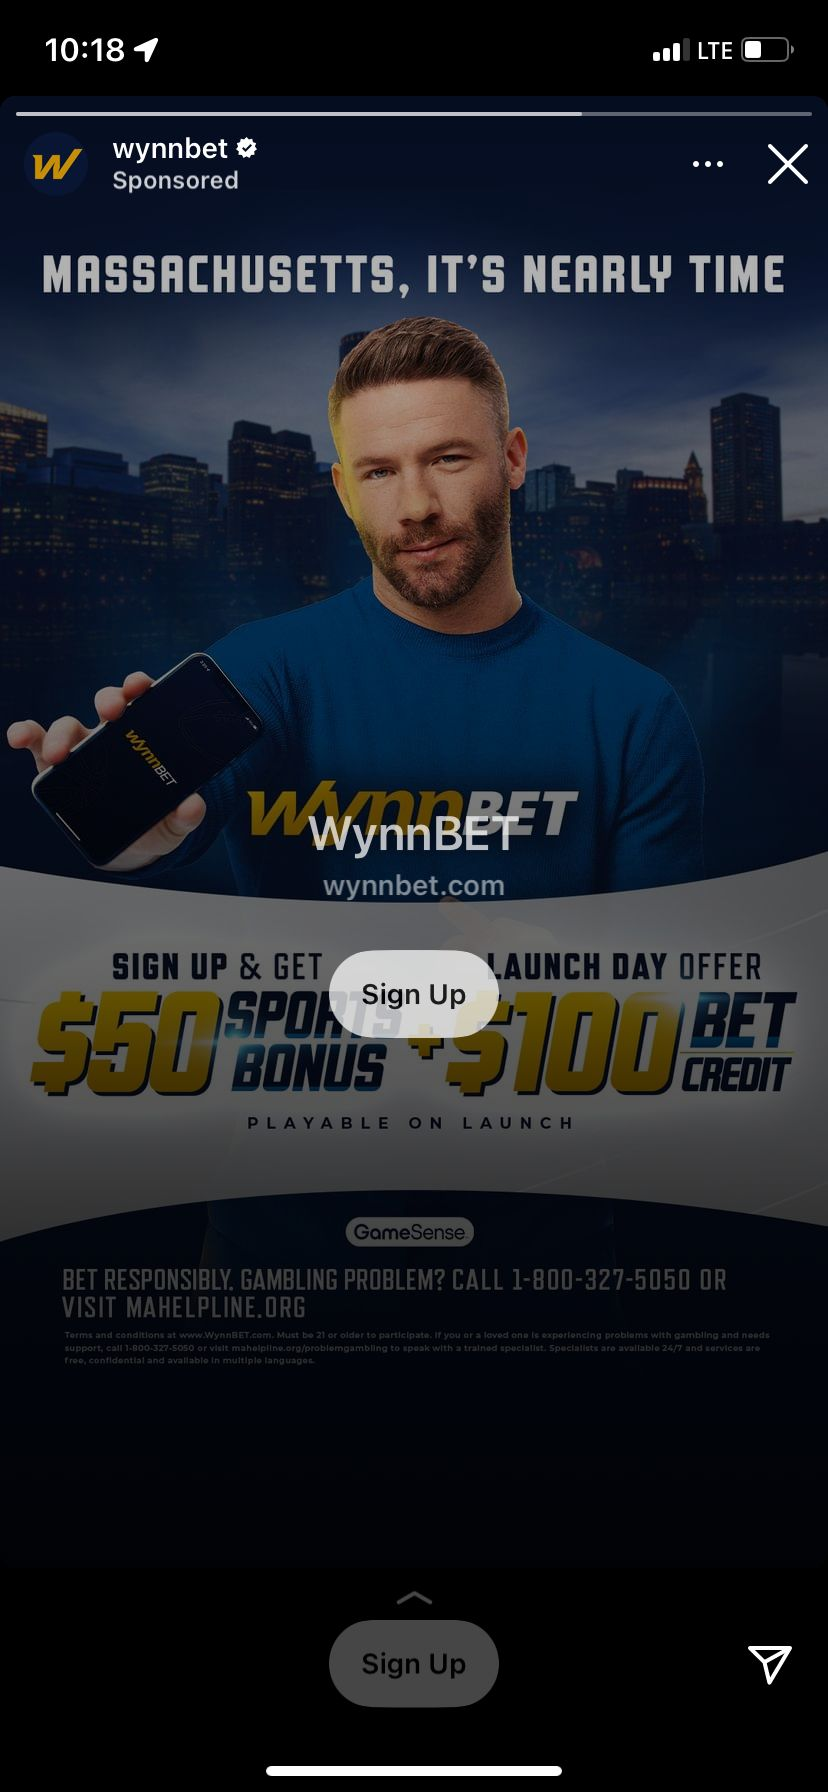